# Obesity Dataset Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
from mlxtend.plotting import scatterplotmatrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Use pandas to read in the csv to a dataframe

In [2]:
obesity_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

Now we can see the first 5 entries in our dataframe

In [3]:
obesity_df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## Data Cleaning & Preprocessing

Fortunately there are no null values in our data set.

In [4]:
print('Null Values: ', obesity_df.isna().sum().sum())

Null Values:  0


Now let's numerically encode our categorical data so that the categorical variables will play nicely with our future predictive models. 

In [5]:
le = LabelEncoder()
full_obesity_df = obesity_df.copy()
full_obesity_df['family_history_with_overweight_enc']= le.fit_transform(obesity_df['family_history_with_overweight'])
full_obesity_df['CAEC_enc']= le.fit_transform(obesity_df['CAEC'])
full_obesity_df['FAVC_enc']= le.fit_transform(obesity_df['FAVC'])
full_obesity_df['SMOKE_enc']= le.fit_transform(obesity_df['SMOKE'])
full_obesity_df['SCC_enc']= le.fit_transform(obesity_df['SCC'])
full_obesity_df['CALC_enc']= le.fit_transform(obesity_df['CALC'])
full_obesity_df['MTRANS_enc']= le.fit_transform(obesity_df['MTRANS'])
full_obesity_df['NObeyesdad_enc']= full_obesity_df['NObeyesdad'].replace(['Insufficient_Weight'
                                                                          , 'Normal_Weight'
                                                                          , 'Overweight_Level_I'
                                                                          , 'Overweight_Level_II'
                                                                          , 'Obesity_Type_I'
                                                                          , 'Obesity_Type_II'
                                                                          , 'Obesity_Type_III'],[-1,0,1,2,3,4,5])

In [6]:
full_obesity_df['BMI']= full_obesity_df['Weight']/full_obesity_df['Height']**2

We can see all of our new variables which have been numerically encoded at the top of this dataframe now. 

In [7]:
full_obesity_df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  ...           NObeyesdad  \
0  3.0  Sometimes    no  ...        Normal_Weight   
1  3.0  Sometimes   yes  ...        Normal_Weight   
2  3.0  Sometimes    no  ...        Normal_Weight   
3  3.0  Sometimes    no  ...   Overweight_Level_I   
4  1.0  Sometimes    no  ...  Overweight_Level_II   

  family_history_with_overweight_enc  CAEC_enc  FAVC_enc SMOKE_enc SCC_enc  \
0                                  1         2         0         0       0   
1                                  1         2         0         1       1   
2                                  1         2         0         0       0   
3                                  0         2         0         0       0   
4                                  0         2         0         0       0   

  CALC_enc  MTRANS_enc  NObeyesdad_enc        BMI  
0        3           3               0  24.386526  
1        2           3               0  24.238227  
2        1           3               0  23.765432  
3        1           4               1  26.851852  
4        2           3               2  28.342381  

[5 rows x 26 columns]

Next, let's also split our data into training and testing data to prepare for future predictive model building

In [8]:
train, test = train_test_split(full_obesity_df, test_size=.2, random_state = 42)

## Descriptive Statistics

In [9]:
full_obesity_df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  \
count  2111.000000  2111.000000  2111.000000   
mean      2.008011     1.010298     0.657866   
std       0.612953     0.850592     0.608927   
min       1.000000     0.000000     0.000000   
25%       1.584812     0.124505     0.000000   
50%       2.000000     1.000000     0.625350   
75%       2.477420     1.666678     1.000000   
max       3.000000     3.000000     2.000000   

       family_history_with_overweight_enc     CAEC_enc     FAVC_enc  \
count                         2111.000000  2111.000000  2111.000000   
mean                             0.817622     1.859308     0.883941   
std                              0.386247     0.468543     0.320371   
min                              0.000000     0.000000     0.000000   
25%                              1.000000     2.000000     1.000000   
50%                              1.000000     2.000000     1.000000   
75%                              1.000000     2.000000     1.000000   
max                              1.000000     3.000000     1.000000   

         SMOKE_enc      SCC_enc     CALC_enc   MTRANS_enc  NObeyesdad_enc  \
count  2111.000000  2111.000000  2111.000000  2111.000000     2111.000000   
mean      0.020843     0.045476     2.268593     2.365230        2.112269   
std       0.142893     0.208395     0.515498     1.261423        1.985062   
min       0.000000     0.000000     0.000000     0.000000       -1.000000   
25%       0.000000     0.000000     2.000000     3.000000        0.000000   
50%       0.000000     0.000000     2.000000     3.000000        2.000000   
75%       0.000000     0.000000     3.000000     3.000000        4.000000   
max       1.000000     1.000000     3.000000     4.000000        5.000000   

               BMI  
count  2111.000000  
mean     29.700159  
std       8.011337  
min      12.998685  
25%      24.325802  
50%      28.719089  
75%      36.016501  
max      50.811753

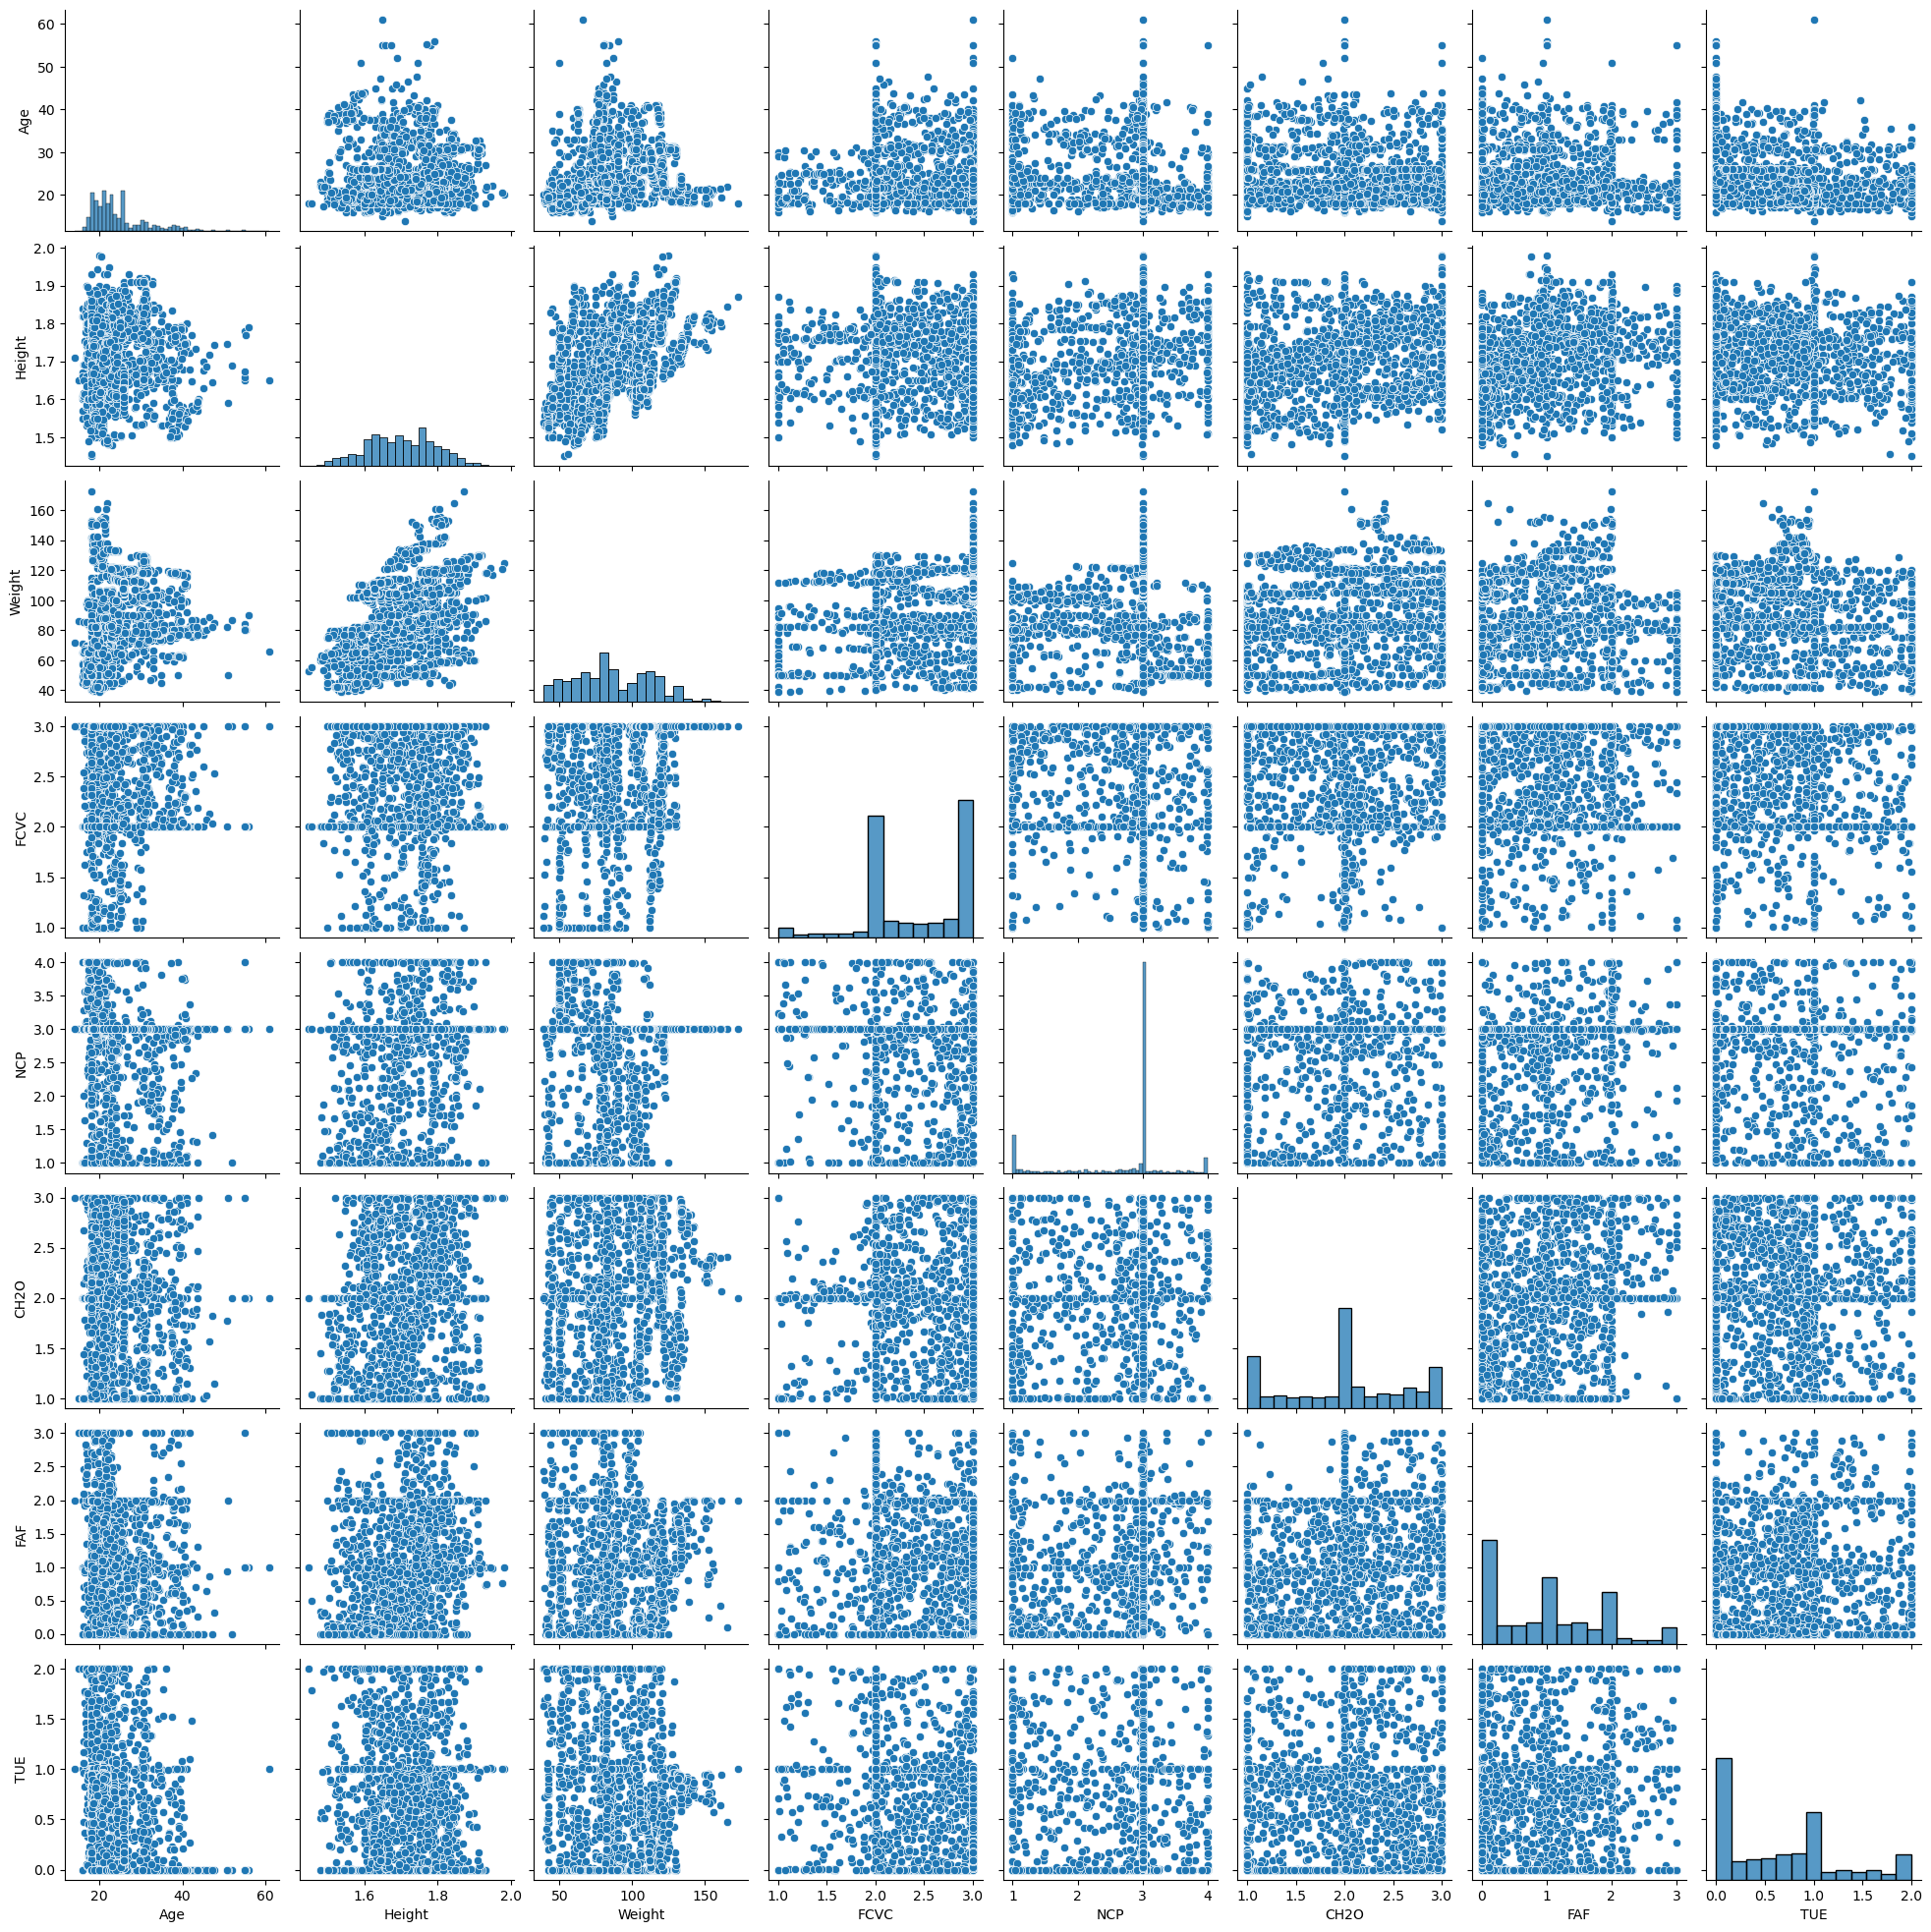

In [10]:
sns.pairplot(obesity_df)

In [11]:
sns.pairplot(full_obesity_df)

In [12]:
full_obesity_df.corr()

Age    Height    Weight      FCVC  \
Age                                 1.000000 -0.025958  0.202560  0.016291   
Height                             -0.025958  1.000000  0.463136 -0.038121   
Weight                              0.202560  0.463136  1.000000  0.216125   
FCVC                                0.016291 -0.038121  0.216125  1.000000   
NCP                                -0.043944  0.243672  0.107469  0.042216   
CH2O                               -0.045304  0.213376  0.200575  0.068461   
FAF                                -0.144938  0.294709 -0.051436  0.019939   
TUE                                -0.296931  0.051912 -0.071561 -0.101135   
family_history_with_overweight_enc  0.205725  0.247684  0.496820  0.040372   
CAEC_enc                            0.083739  0.048818  0.287493 -0.054670   
FAVC_enc                            0.063902  0.178364  0.272300 -0.027283   
SMOKE_enc                           0.091987  0.055499  0.025746  0.014320   
SCC_enc                            -0.116283 -0.133753 -0.201906  0.071852   
CALC_enc                           -0.044487 -0.129732 -0.206677 -0.060781   
MTRANS_enc                         -0.601945 -0.073609  0.004610  0.064743   
NObeyesdad_enc                      0.282913  0.133565  0.913251  0.227759   
BMI                                 0.244163  0.131785  0.934806  0.263651   

                                         NCP      CH2O       FAF       TUE  \
Age                                -0.043944 -0.045304 -0.144938 -0.296931   
Height                              0.243672  0.213376  0.294709  0.051912   
Weight                              0.107469  0.200575 -0.051436 -0.071561   
FCVC                                0.042216  0.068461  0.019939 -0.101135   
NCP                                 1.000000  0.057088  0.129504  0.036326   
CH2O                                0.057088  1.000000  0.167236  0.011965   
FAF                                 0.129504  0.167236  1.000000  0.058562   
TUE                                 0.036326  0.011965  0.058562  1.000000   
family_history_with_overweight_enc  0.071370  0.147437 -0.056673  0.022943   
CAEC_enc                           -0.097801  0.144995 -0.030110 -0.048567   
FAVC_enc                           -0.007000  0.009719 -0.107995  0.068417   
SMOKE_enc                           0.007811 -0.031995  0.011216  0.017613   
SCC_enc                            -0.015624  0.008036  0.074221 -0.010928   
CALC_enc                           -0.071747 -0.091386  0.086799  0.045864   
MTRANS_enc                         -0.053858  0.044028  0.006394  0.176945   
NObeyesdad_enc                      0.026690  0.133008 -0.199901 -0.107991   
BMI                                 0.039969  0.144200 -0.177537 -0.099720   

                                    family_history_with_overweight_enc  \
Age                                                           0.205725   
Height                                                        0.247684   
Weight                                                        0.496820   
FCVC                                                          0.040372   
NCP                                                           0.071370   
CH2O                                                          0.147437   
FAF                                                          -0.056673   
TUE                                                           0.022943   
family_history_with_overweight_enc                            1.000000   
CAEC_enc                                                      0.169787   
FAVC_enc                                                      0.208036   
SMOKE_enc                                                     0.017385   
SCC_enc                                                      -0.185422   
CALC_enc                                                      0.036676   
MTRANS_enc                                                   -0.101540   
NObeyesdad_enc                                 

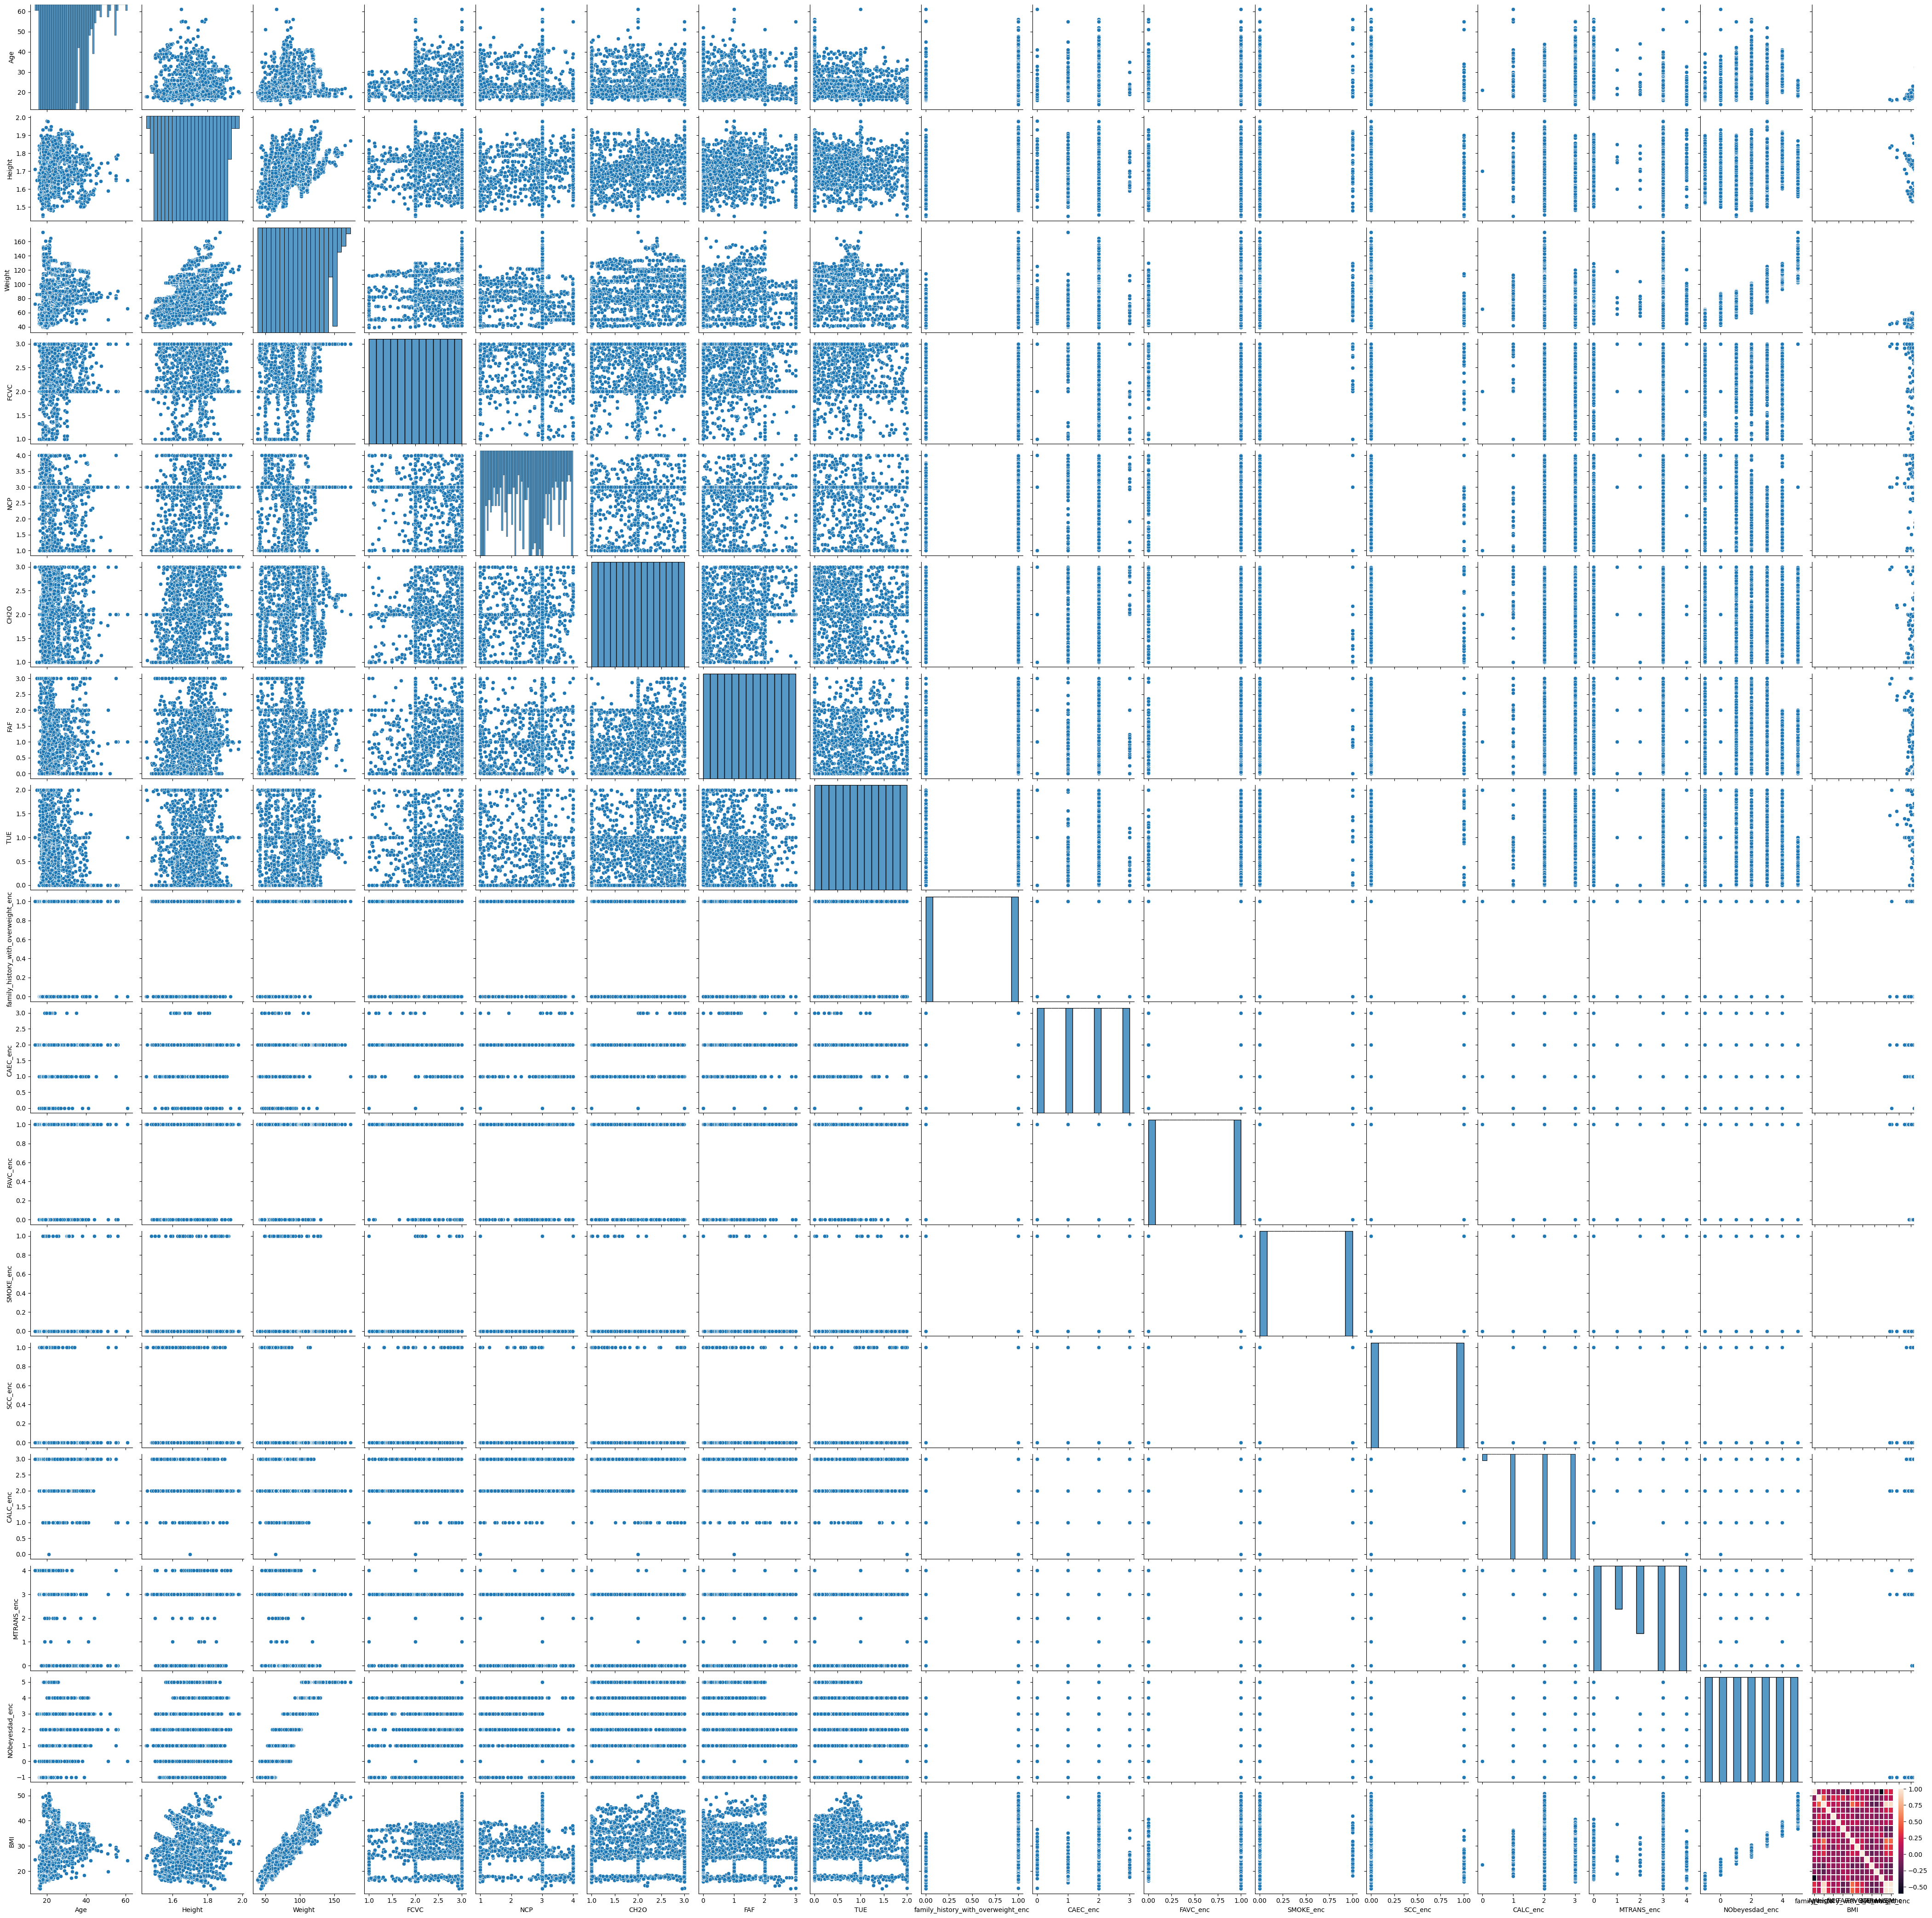

In [13]:
sns.heatmap(data=full_obesity_df.corr(), linewidths=0.3)
plt.show()

In [14]:
full_obesity_df.corrwith(full_obesity_df['NObeyesdad_enc'])

Age                                   0.282913
Height                                0.133565
Weight                                0.913251
FCVC                                  0.227759
NCP                                   0.026690
CH2O                                  0.133008
FAF                                  -0.199901
TUE                                  -0.107991
family_history_with_overweight_enc    0.505148
CAEC_enc                              0.329350
FAVC_enc                              0.247793
SMOKE_enc                             0.003442
SCC_enc                              -0.194508
CALC_enc                             -0.151752
MTRANS_enc                            0.011818
NObeyesdad_enc                        1.000000
BMI                                   0.977826
dtype: float64

In [15]:
full_obesity_df.corrwith(full_obesity_df['BMI'])

Age                                   0.244163
Height                                0.131785
Weight                                0.934806
FCVC                                  0.263651
NCP                                   0.039969
CH2O                                  0.144200
FAF                                  -0.177537
TUE                                  -0.099720
family_history_with_overweight_enc    0.483508
CAEC_enc                              0.313278
FAVC_enc                              0.246097
SMOKE_enc                            -0.000819
SCC_enc                              -0.184286
CALC_enc                             -0.169805
MTRANS_enc                            0.022061
NObeyesdad_enc                        0.977826
BMI                                   1.000000
dtype: float64

In [16]:
X_train = train[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_train = train[['BMI']]

X_test = test[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_test = test[['BMI']]

Now we must scale our data to properly use lasso regression

In [17]:
scale = StandardScaler()

In [18]:
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns = ['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'])
X_test = pd.DataFrame(X_test, columns = ['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'])

In [19]:
lambdas = 10**np.linspace(7,-2,90)

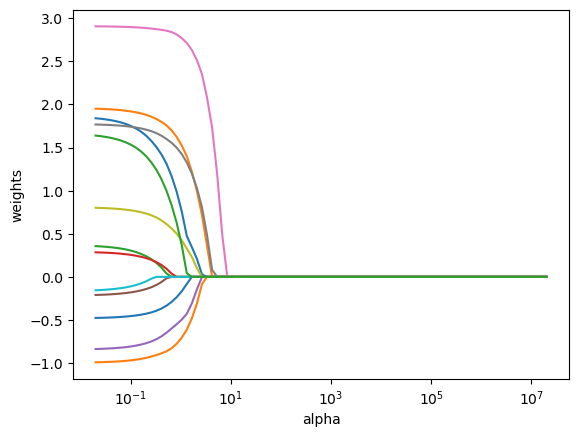

In [20]:
lasso = Lasso(max_iter = 100000) #Note you'll want to include this max_iter parameter for lasso regression.
coefs = []

for l in lambdas:
    lasso.set_params(alpha=l)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [21]:
lassocv = LassoCV(alphas = lambdas, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

print('Lamda 10-fold CV: ',lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('MSE 10-fold CV: ',mean_squared_error(y_test, lasso.predict(X_test)))

pd.Series(lasso.coef_, index=X_train.columns)

Lamda 10-fold CV:  0.01
MSE 10-fold CV:  34.72419408353556


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Age                                   1.839204
FCVC                                  1.950081
NCP                                   0.356367
CH2O                                  0.284756
FAF                                  -0.836565
TUE                                  -0.209841
family_history_with_overweight_enc    2.905003
CAEC_enc                              1.766916
FAVC_enc                              0.801038
SMOKE_enc                            -0.155424
SCC_enc                              -0.476227
CALC_enc                             -0.990706
MTRANS_enc                            1.638215
dtype: float64

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [23]:
scores = pca.transform(X_train)

In [24]:
pca.components_ 

array([[ 0.57842453, -0.03402501, -0.00891953,  0.01432009, -0.20282589,
        -0.26502125,  0.33190332,  0.23810599,  0.25360873,  0.03389323,
        -0.24887369, -0.07075921, -0.50333164],
       [ 0.29055332,  0.06621059, -0.10620164, -0.31393047, -0.04767212,
        -0.34388568, -0.38369729, -0.36853305, -0.41973806,  0.209543  ,
         0.32002127,  0.05722875, -0.26835895],
       [ 0.080937  ,  0.35122313,  0.4614443 ,  0.50245021,  0.47933768,
        -0.10858162,  0.14673858, -0.08549483, -0.13137867,  0.15596814,
         0.18920314, -0.20325038, -0.12495336],
       [-0.0456142 ,  0.31850565, -0.13208715, -0.01584058, -0.39573923,
        -0.07489605, -0.0532951 ,  0.00285997,  0.17258519,  0.36517617,
         0.05577609, -0.68743376,  0.27366516],
       [ 0.00865371, -0.12594852,  0.51722205, -0.39257797, -0.03355147,
         0.41460642,  0.10453404, -0.42196177,  0.17321412,  0.33561107,
        -0.20514162, -0.02843943, -0.1220364 ],
       [ 0.03725318, -0.616534

In [25]:
i = 0
for c in pca.explained_variance_ratio_:
    i = i+1
    print("For component " + str(i) + " the percentage of the variance explained is: {:.2%}".format(c))

For component 1 the percentage of the variance explained is: 15.07%
For component 2 the percentage of the variance explained is: 11.42%
For component 3 the percentage of the variance explained is: 10.07%
For component 4 the percentage of the variance explained is: 8.89%
For component 5 the percentage of the variance explained is: 8.29%
For component 6 the percentage of the variance explained is: 7.74%
For component 7 the percentage of the variance explained is: 7.26%
For component 8 the percentage of the variance explained is: 6.56%
For component 9 the percentage of the variance explained is: 6.15%
For component 10 the percentage of the variance explained is: 5.73%
For component 11 the percentage of the variance explained is: 5.50%
For component 12 the percentage of the variance explained is: 4.79%
For component 13 the percentage of the variance explained is: 2.53%


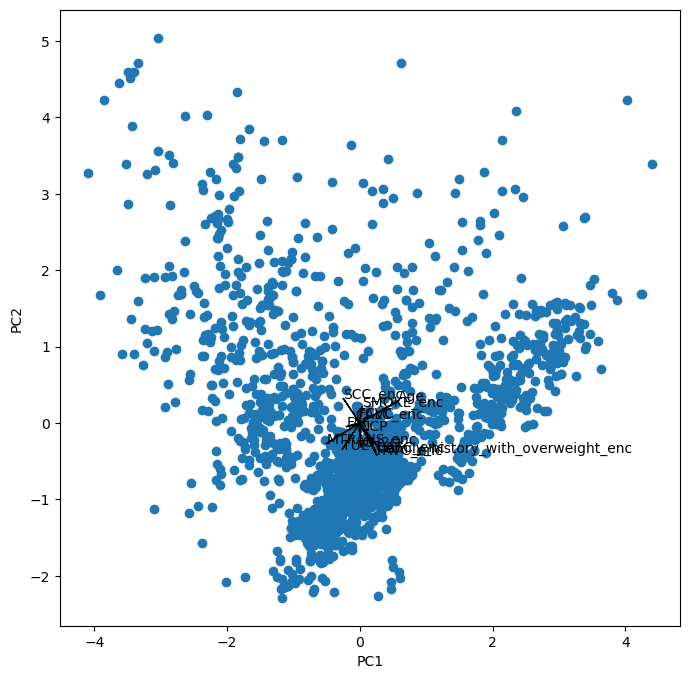

In [26]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i,k], pca.components_[j,k])
    ax.text(pca.components_[i,k],
            pca.components_[j,k],
            X_train.columns[k])
fig

In [27]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

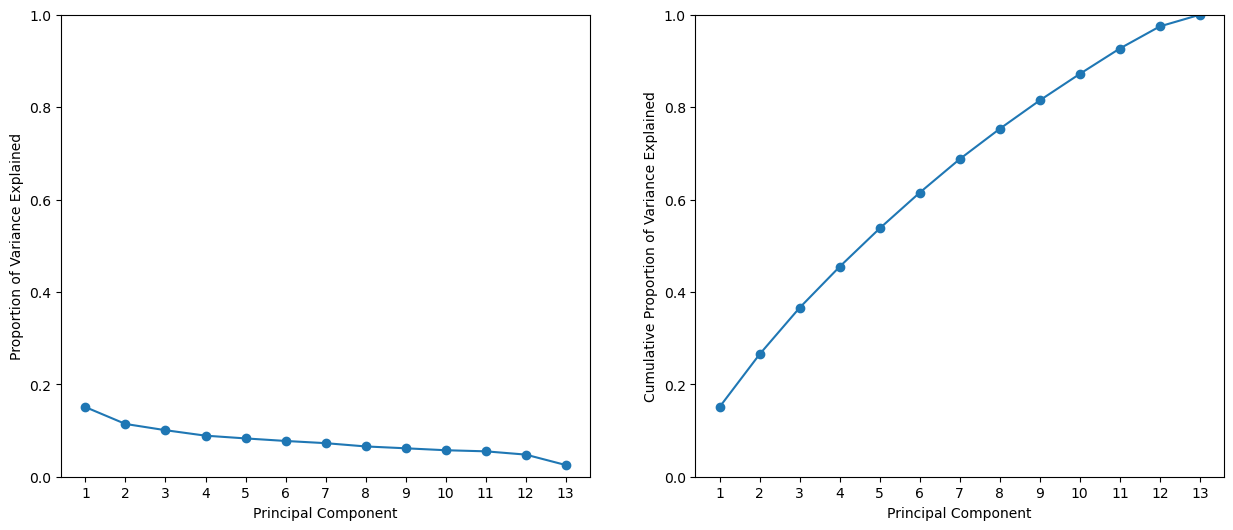

In [28]:
ax = axes[1]
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig


In [29]:
def fit_linear_reg(X,y):
    #Fit linear regression model and return RSS
    model_k = linear_model.LinearRegression()
    model_k.fit(X,y)
    R_squared = model_k.score(X,y)
    return R_squared

In [30]:
import itertools

In [31]:
#Create a list of the predictor variables.
remaining_features = list(X_train.columns.values)
#Create a list of the features chosen at each step of the algorithm 
features = []

#These are values we'll use for plotting our results.
R2_list, features_list = [], []

#The forward subset selection algorithm
for i in range(1,len(X_train.columns)+1):
    best_R2 = 0
    
    for combo in itertools.combinations(remaining_features,1):

            R2 = fit_linear_reg(X_train[list(combo) + features],y_train)   #Store temp result 

            if R2 > best_R2:
                best_R2 = R2 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    R2_list.append(best_R2)
    features_list.append(features.copy())

In [32]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'R_squared':R2_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [33]:
m = len(y_train)
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))

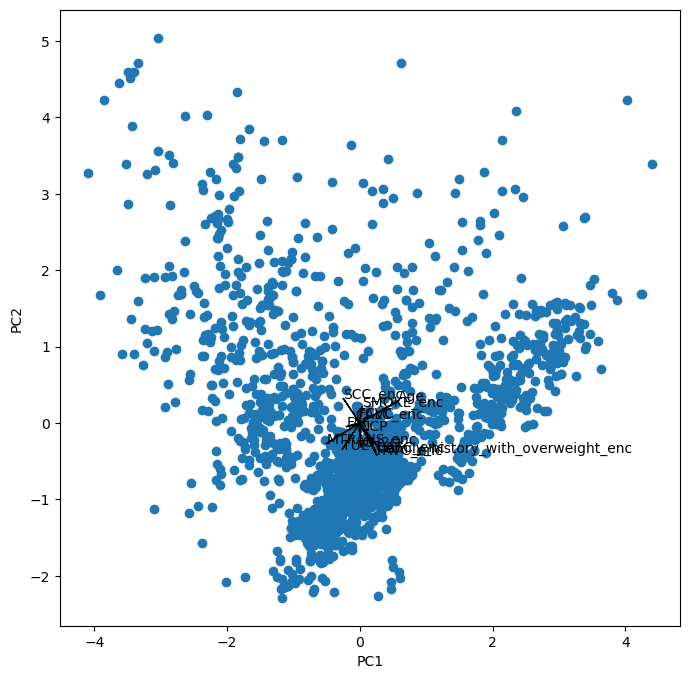

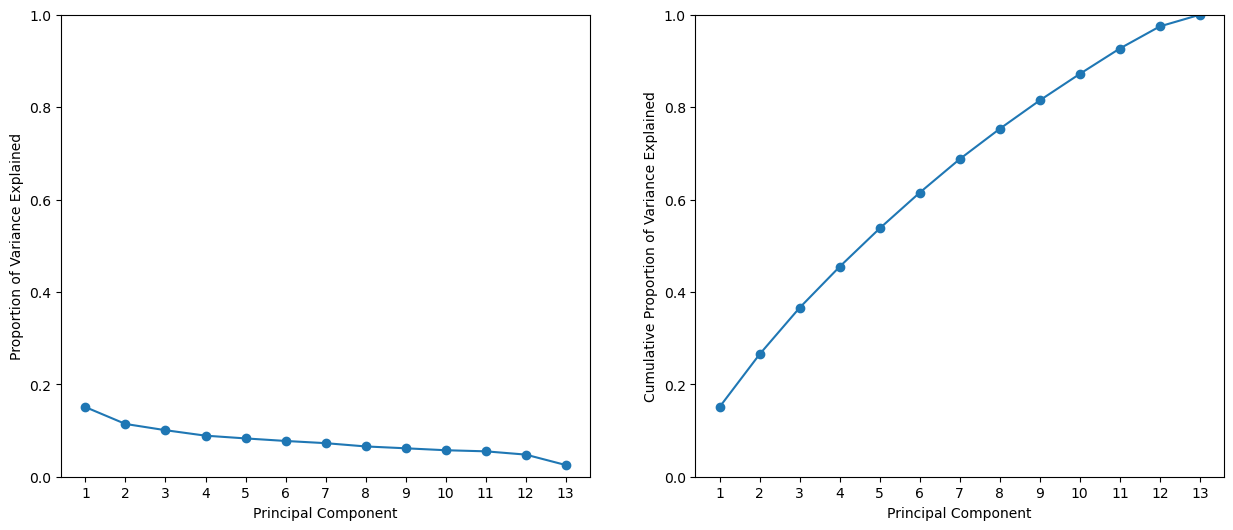

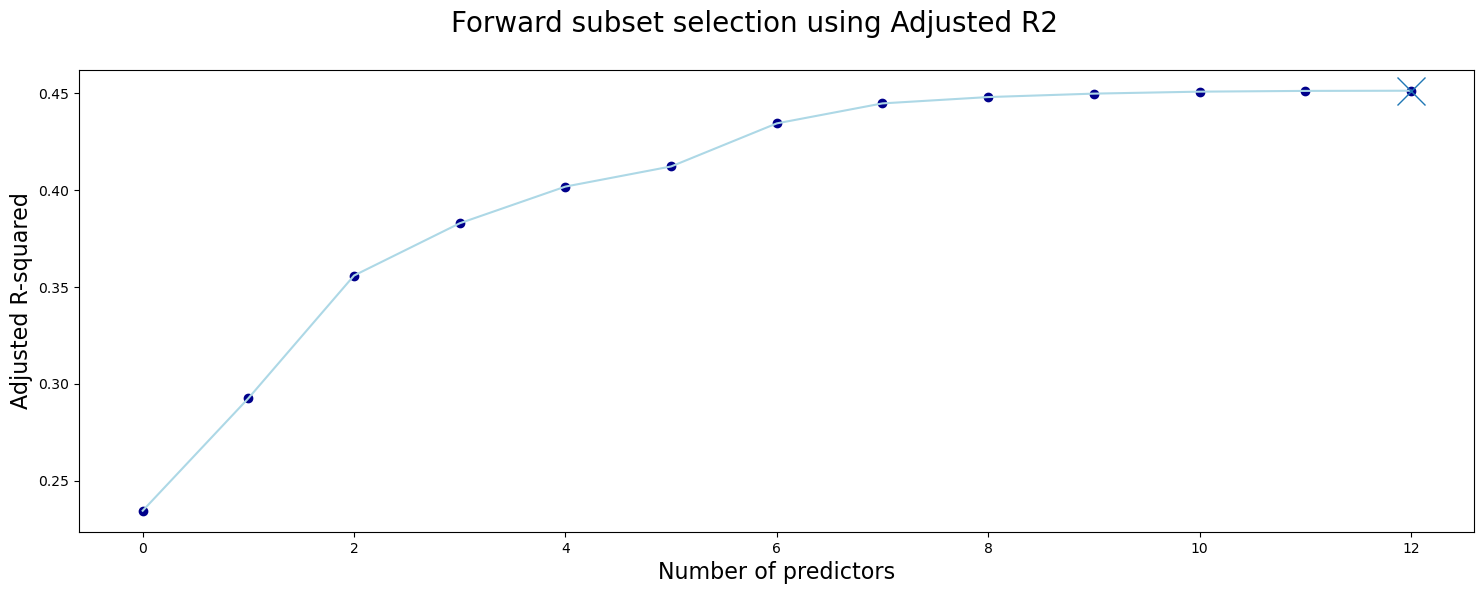

The features in the selected model are:


['family_history_with_overweight_enc',
 'FCVC',
 'CAEC_enc',
 'CALC_enc',
 'FAF',
 'Age',
 'MTRANS_enc',
 'FAVC_enc',
 'SCC_enc',
 'NCP',
 'CH2O',
 'TUE',
 'SMOKE_enc']

In [34]:
fig = plt.figure(figsize = (18,6))
plt.plot(df1['numb_features'],df1['R_squared_adj'], color = 'lightblue')
plt.scatter(df1['numb_features'],df1['R_squared_adj'], color = 'darkblue')
plt.plot(df1['R_squared_adj'].idxmax(),df1['R_squared_adj'].max(), marker = 'x', markersize = 20)
plt.xlabel('Number of predictors', fontsize = 16)
plt.ylabel('Adjusted R-squared', fontsize = 16)
fig.suptitle('Forward subset selection using Adjusted R2', fontsize = 20)
plt.show()
print('The features in the selected model are:')
display(df1.iloc[df1['R_squared_adj'].idxmax()]['features'])

### Trees

In [35]:
X_train = train[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_train = train[['BMI']]

X_test = test[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_test = test[['BMI']]

In [36]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

In [37]:
regressor = DecisionTreeRegressor(random_state=42)

In [38]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Unpruned decision tree:

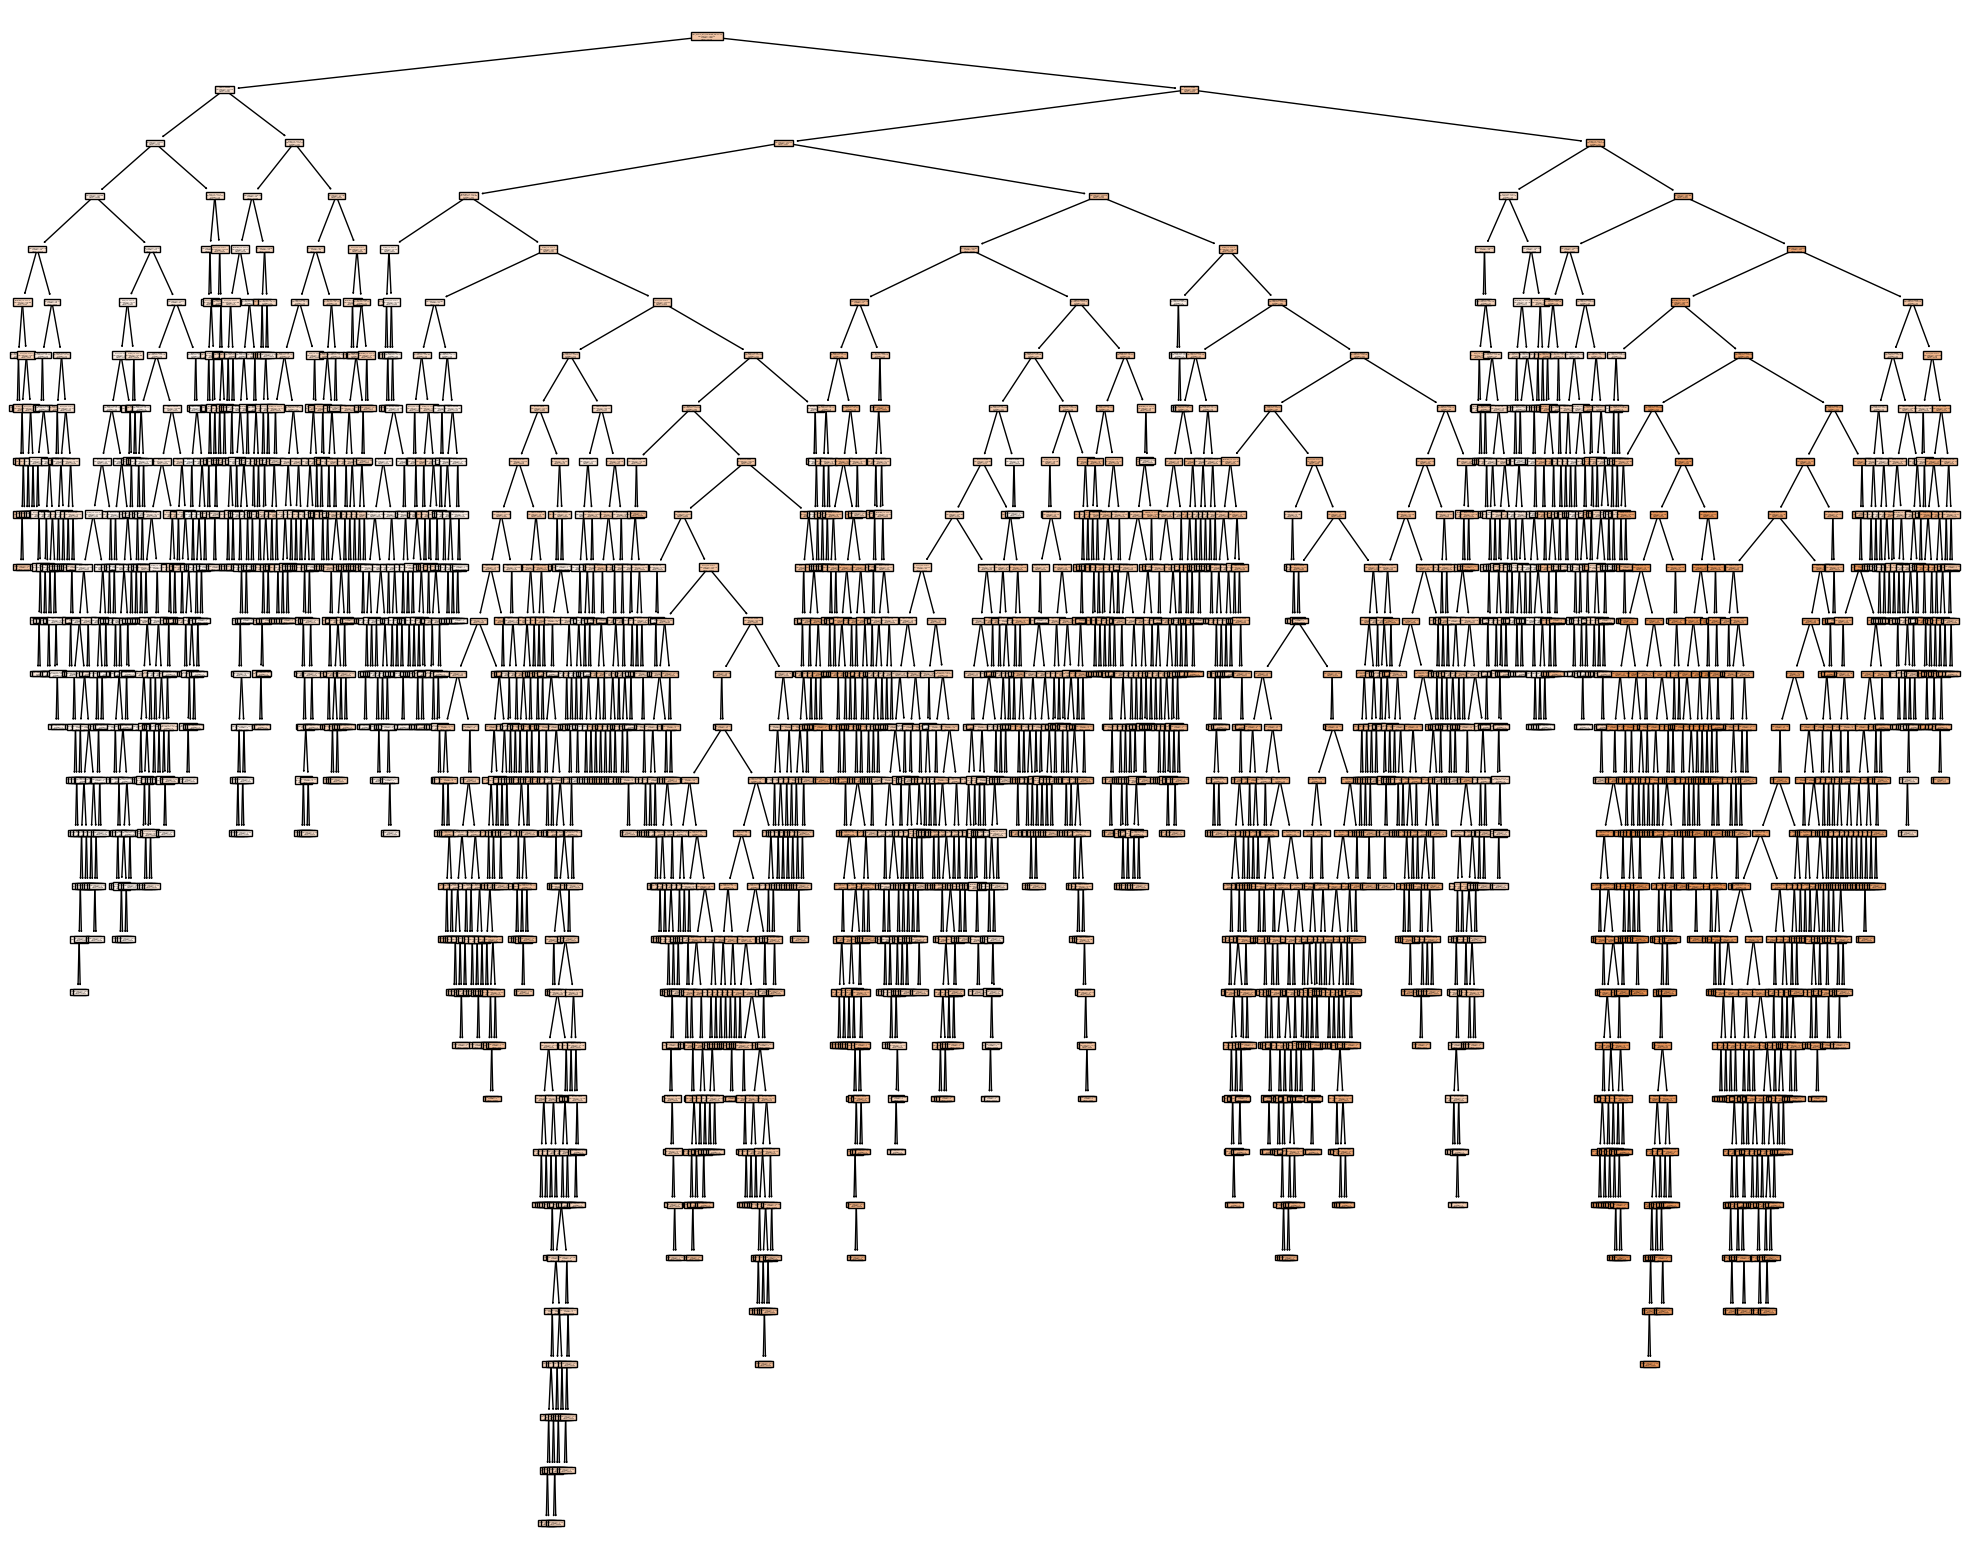

In [39]:
plt.figure(figsize=(25, 20))
plot_tree(regressor, 
          feature_names=['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'],  
          filled=True)
plt.show()

In [40]:
MSE = np.mean((y_test.values - regressor.predict(X_test))**2)
print('The MSE of the unpruned decision tree is: ' + str(MSE))

The MSE of the unpruned decision tree is: 134.23551882086005


### Pruned Decision Tree

In [41]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)

In [42]:
import sklearn.model_selection as skm

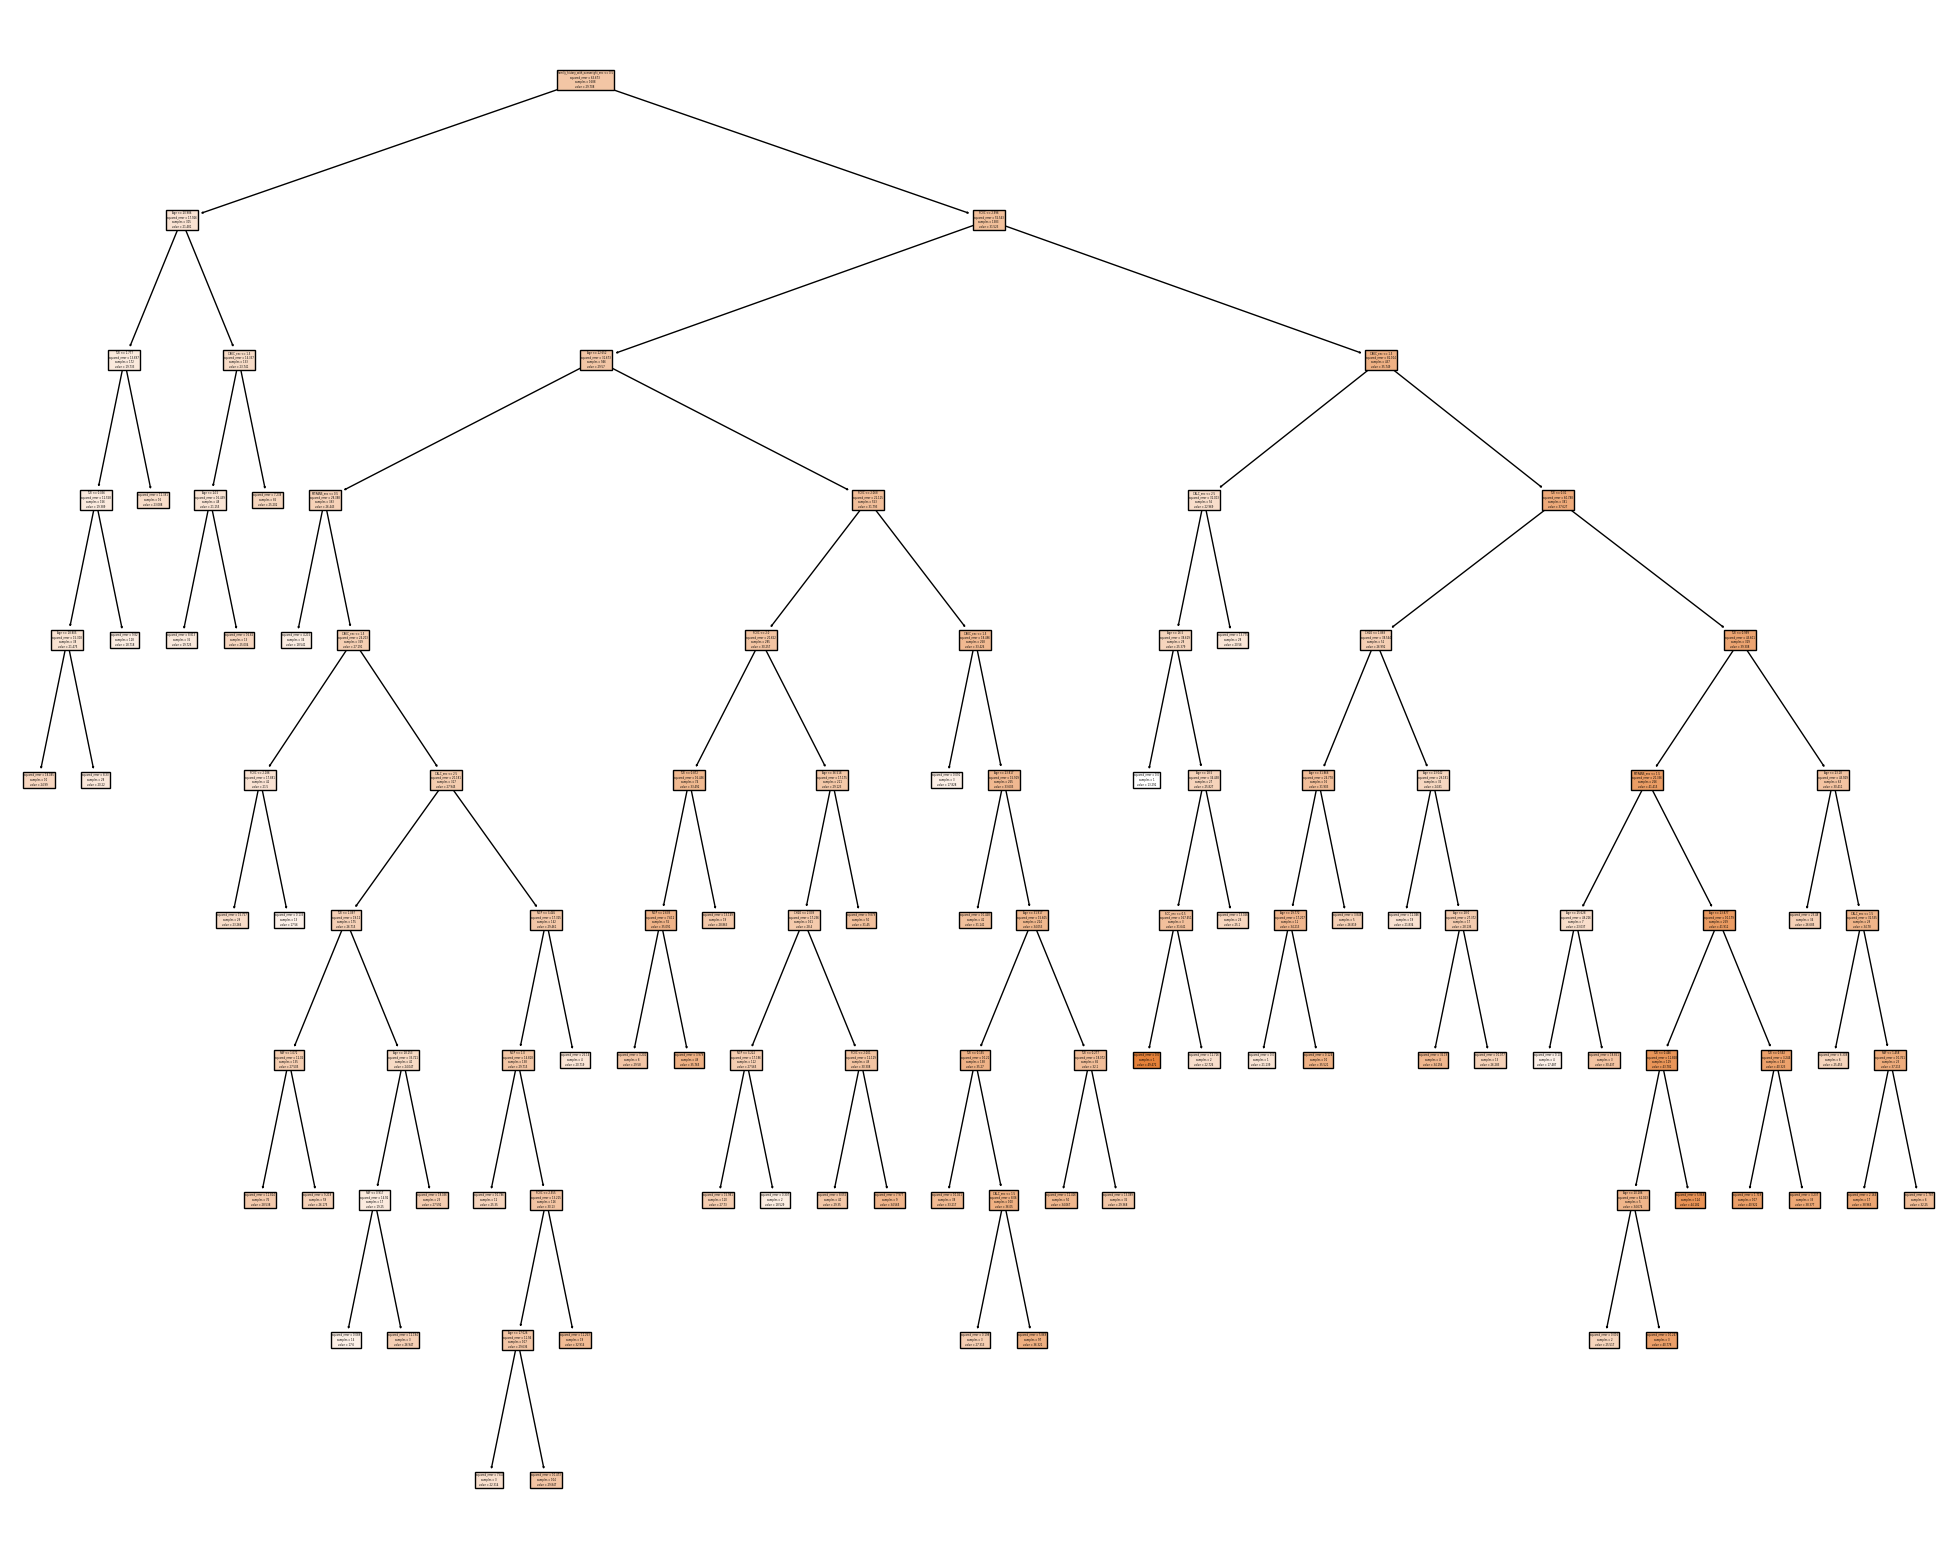

The MSE of the pruned decision tree is: 120.75622525112618


In [43]:
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(regressor,
                        {'ccp_alpha': path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

best = grid.best_estimator_

# Visualize the pruned tree
plt.figure(figsize=(25, 20))
plot_tree(G.best_estimator_, 
          feature_names=['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'],  
          filled=True)
plt.show()

MSE = np.mean((y_test.values - best.predict(X_test))**2)
print('The MSE of the pruned decision tree is: ' + str(MSE))


We can see that the pruned tree has an improved accuracy over the unpruned tree. 

### Bagging:

In [44]:
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [45]:
bag = RF(max_features=X_train.shape[1], random_state=0)
bag.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=13, random_state=0)

In [46]:
from matplotlib.pyplot import subplots

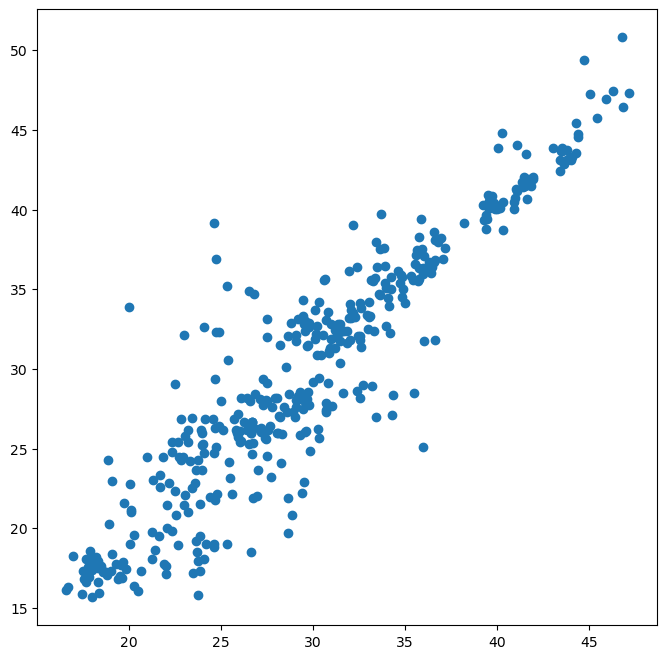

In [47]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag.predict(X_test)
ax.scatter(y_hat_bag, y_test)
MSE = np.mean((y_test.values - y_hat_bag)**2)
plt.show()

In [48]:
print('The MSE using bagging is: ' + str(MSE))

The MSE using bagging is: 120.08019348952159


This is slightly worse than the unpruned decision tree. Let's see how a random forest does. 

### Random Forest

In [49]:
RF = RF(max_features=6,
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF.predict(X_test)
MSE = np.mean((y_test.values - y_hat_RF)**2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [50]:
print('The MSE using a random forest is: ' + str(MSE))

The MSE using a random forest is: 117.18319949552543


The MSE using a random forest improved on the accuracy of the unpruned decision tree. 

In [51]:
feature_imp = pd.DataFrame(
    {'importance':RF.feature_importances_},
    index=['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'])
feature_imp.sort_values(by='importance', ascending=False)

importance
family_history_with_overweight_enc    0.172425
FCVC                                  0.150152
Age                                   0.149556
TUE                                   0.123741
CAEC_enc                              0.112890
FAF                                   0.102459
NCP                                   0.067062
CH2O                                  0.045631
MTRANS_enc                            0.032258
CALC_enc                              0.028167
FAVC_enc                              0.009698
SCC_enc                               0.004573
SMOKE_enc                             0.001389

### Boosting

In [52]:
boost = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
boost.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


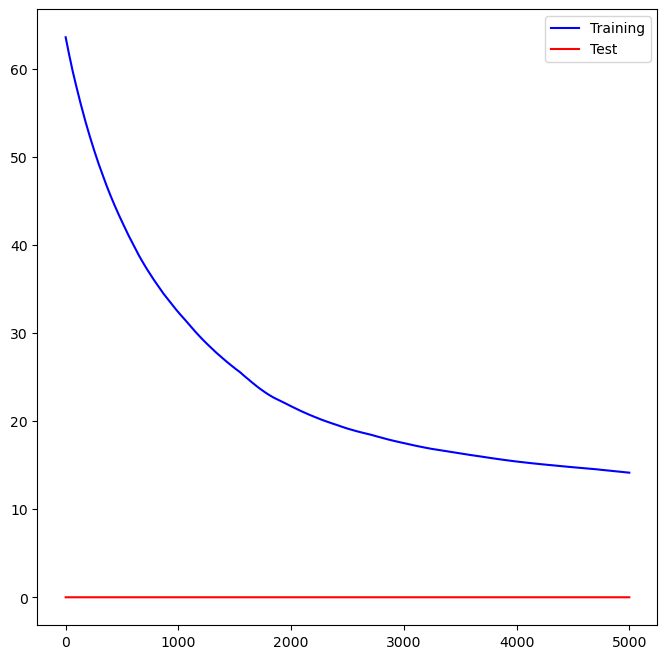

In [53]:
test_error = np.zeros_like(boost.train_score_)
for idx, y_ in enumerate(boost.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test.values - y_test)**2)

plot_idx = np.arange(boost.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

plt.show()

In [54]:
y_hat_boost = boost.predict(X_test);
MSE = np.mean((y_test.values - y_hat_boost)**2)
print('The MSE using gradient boosting is: ' + str(MSE))

The MSE using gradient boosting is: 104.46952649529979


The accuracy using gradient boosting is an improvement over the random forest. Let's see what happens with an adjustment in the learning rate.

In [55]:
boost = GBR(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=0)
boost.fit(X_train,
                 y_train)
y_hat_boost = boost.predict(X_test);
MSE = np.mean((y_test.values - y_hat_boost)**2)
print('The MSE using gradient boosting with a larger learning rate is: ' + str(MSE))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The MSE using gradient boosting with a larger learning rate is: 122.03309554248776


This is far less accurate than previous gradient boosting model with a learning rate of .001

### KNN 

First, we must scale our data. 

In [56]:
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns = ['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'])
X_test = pd.DataFrame(X_test, columns = ['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'])

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
KNN = KNeighborsRegressor(n_neighbors=1)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

K=1

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
mse_val = [] #to store rmse values for different k
L = [1,5,100]
for K in L:
    KNN = KNeighborsRegressor(n_neighbors = K)

    KNN.fit(X_train, y_train)  #fit the model
    pred=KNN.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    mse_val.append(error) #store rmse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  1 is: 18.162306533665184
MSE value for k=  5 is: 14.282308535704864
MSE value for k=  100 is: 33.58395042295231


In [61]:
from sklearn.model_selection import GridSearchCV
neighbors = [2,3,4,5,6,7,8,9,10,20,40,50]
params = {'n_neighbors':neighbors}

KNN = KNeighborsRegressor()

model = GridSearchCV(KNN, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [62]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)
error = mean_squared_error(y_test,pred)
print('MSE for k=3 is: ' + str(error))

MSE for k=3 is: 13.769625059943692


In [63]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering

In [64]:
X_train = train[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_train = train[['NObeyesdad_enc']]

X_test = test[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_test = test[['NObeyesdad_enc']]

In [65]:
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns = ['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'])
X_test = pd.DataFrame(X_test, columns = ['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc'])

In [66]:
kmeans = KMeans(n_clusters = 15, n_init = 20)

In [67]:
kmeans.fit(X_train)

KMeans(n_clusters=15, n_init=20)

In [68]:
X_train = kmeans.transform(X_train)

[[ 0  0  6 11  3  0  1  0  2  1  0  4  6  5  7 10]
 [ 0  0 13 13  0  1  6  2  2  1  2  4  4  1  0 13]
 [ 0  8  1  5  6  0  2  1  4 10  1  4 11  1  1  1]
 [ 0  2 14  1  4  3  3  9  0  6  0  4  0  0  3  1]
 [ 0  8  1  1  4  3 16  3  0 19  0 10  1  0 11  1]
 [ 0 16  0  0  6  6  9  6  0 11  2  1  0  0  0  1]
 [ 0  0  0  0 22 41  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


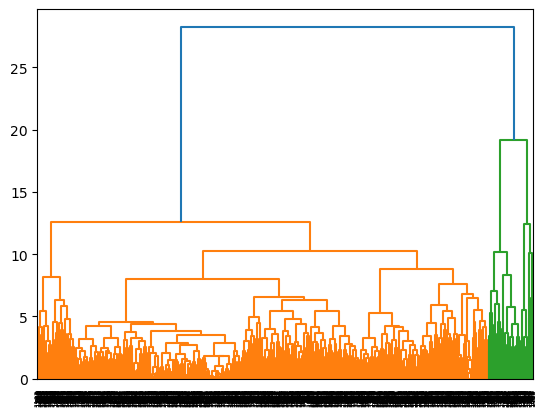

In [69]:
ypred_selected = kmeans.predict(X_test)

cm = confusion_matrix(y_test, ypred_selected)
print(cm)

complete_clustering = linkage(X_train, method="complete", metric="euclidean")
dendrogram(complete_clustering)
plt.show()

The heirarchical cluster shows that the best number of clusters is in the 15-23 range if we want to separate into two groups.
However, if we want to separate into more groups, which we may since there are 7 classifications on on dataset, the more maybe needed.

In [70]:
X_train = train[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_train = train[['BMI']]

X_test = test[['Age','FCVC','NCP','CH2O','FAF','TUE','family_history_with_overweight_enc','CAEC_enc','FAVC_enc'
                 ,'SMOKE_enc','SCC_enc','CALC_enc','MTRANS_enc']]
y_test = test[['BMI']]

In [71]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [72]:
print('R^2 ', +regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
print('MSE ', +mean_squared_error(y_test,y_pred))

R^2  0.47435495779241077
MSE  34.72209099628466


In [73]:
pd.Series(regr.coef_[0], index=X_train.columns)

Age                                   0.287446
FCVC                                  3.646354
NCP                                   0.471740
CH2O                                  0.479211
FAF                                  -1.005271
TUE                                  -0.360700
family_history_with_overweight_enc    7.555828
CAEC_enc                              3.714618
FAVC_enc                              2.563380
SMOKE_enc                            -1.109430
SCC_enc                              -2.352154
CALC_enc                             -1.930286
MTRANS_enc                            1.308464
dtype: float64